## Project 3 - Experiments

In [5]:
from sp_exact_3 import *

import os
import matplotlib.pyplot as plt

What is the score of an optimal aligment of the first 3 sequences in brca1-testseqs.fasta (i.e. brca1_bos_taurus, brca1_canis_lupus and brca1_gallus_gallus) as computed by your program sp_exact_3? How does an optimal alignment look like?

What is the score of the alignment of the first 5 sequences in brca1-testseqs.fasta (i.e. brca1_bos_taurus, brca1_canis_lupus, brca1_gallus_gallus, brca1_homo_sapiens, and brca1_macaca_mulatta) as computed by your program sp_approx? Which of the 5 sequences is choosen as the 'center string'?

Make an experiment comparing the scores of the alignments computed by sp_exact_3 and sp_approx that validates that the approximation ratio of sp_approx is 2(k-1)/k for k sequences. i.e 4/3 for three sequences.

You should use the testdata in testseqs.zip that contains 20 fasta files (testseqs_10_3.fasta, testseqs_20_3.fasta, ..., testseqs_200_3.fasta) each containing 3 sequences of lengths 10, 20, ..., 200.

For each triplet of sequences (i.e. each fasta file), you should compute the optimal score of an MSA using sp_exact_3 and the score of the alignment produced by sp_approx. Make a graph in which you plot the ratio of the computed scores for each sequence length. Comment on what you observe.

In [37]:
# Path to the directory containing the files
directory_path = 'data/testseqs'
# load score matrix
matrix_file = 'data/score_matrix.txt'
score_matrix = initiate_score_matrix(matrix_file)
gap_cost = 5
hide_alignments = True

score_dct = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    # Check if the current item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        #read fasta file
        sequence_dct = read_fasta_file(os.path.join(directory_path, filename))

        # extract the sequence length from name
        file_number = str(''.join(filter(str.isdigit, filename)))
        file_number = file_number[:-1]

        sequence_lst = [] # convert dct values to list
        iterator = iter(sequence_dct.values()) # Extracting the sequences without their corresponding headers and putting them into a list
        for _ in range(len(sequence_dct)):
            sequence_lst.append(next(iterator))


        seq1 = sequence_lst[0]
        seq2 = sequence_lst[1]
        seq3 = sequence_lst[2]

        aligned_exact = sp_exact_3(seq1, seq2, seq3, gap_cost, score_matrix, hide_alignments = hide_alignments) #

        score_dct[file_number] = aligned_exact
        print("File:", filename, " Length:", file_number, " Exact Score:", aligned_exact) # print progress
print(score_dct)


File: testseqs_100_3.fasta  Length: 100  Exact Score: 687
File: testseqs_10_3.fasta  Length: 10  Exact Score: 70
File: testseqs_110_3.fasta  Length: 110  Exact Score: 754
File: testseqs_120_3.fasta  Length: 120  Exact Score: 810
File: testseqs_130_3.fasta  Length: 130  Exact Score: 895
File: testseqs_140_3.fasta  Length: 140  Exact Score: 957
File: testseqs_150_3.fasta  Length: 150  Exact Score: 1023
File: testseqs_160_3.fasta  Length: 160  Exact Score: 1080
File: testseqs_170_3.fasta  Length: 170  Exact Score: 1186
File: testseqs_180_3.fasta  Length: 180  Exact Score: 1158
File: testseqs_190_3.fasta  Length: 190  Exact Score: 1323
File: testseqs_200_3.fasta  Length: 200  Exact Score: 1379
File: testseqs_20_3.fasta  Length: 20  Exact Score: 135
File: testseqs_30_3.fasta  Length: 30  Exact Score: 231
File: testseqs_40_3.fasta  Length: 40  Exact Score: 318
File: testseqs_50_3.fasta  Length: 50  Exact Score: 385
File: testseqs_60_3.fasta  Length: 60  Exact Score: 440
File: testseqs_70_3.f

In [38]:
import os
import subprocess

def run_script(script_path, input_file, help_file):
    """
    Run a script with provided input and help files.

    Args:
        script_path (str): Path to the script to be executed.
        input_file (str): Path to the input file.
        help_file (str): Path to the help file.

    Returns:
        str: Output from the script if successful, None otherwise.
    """
    try:
        with subprocess.Popen(['python', script_path, input_file, help_file],
                              stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                              text=True) as process:
            output, error = process.communicate()
            if process.returncode == 0:
                return output.strip()  # Assuming you want to strip any trailing newline
            else:
                print(f"Error: {error.strip()}")
                return None
    except Exception as e:
        print(f"Error: {e}")
        return None

if __name__ == "__main__":
    script_path = "SP_approxv4.py"
    input_dir = r"data\testseqs"
    help_file = "substitution_matrix_phylip.txt"

    output_dict = {}
    for filename in os.listdir(input_dir):
        if filename.endswith(".fasta"):  # Assuming all test files have a .fasta extension
            print(filename)
            input_file = os.path.join(input_dir, filename)
                    # extract the sequence length from name
            file_number = str(''.join(filter(str.isdigit, filename)))
            file_number = file_number[:-1]

            output = run_script(script_path, input_file, help_file)
            if output is not None:
                output_dict[file_number] = int(output)

    print(output_dict)


testseqs_100_3.fasta
testseqs_10_3.fasta
testseqs_110_3.fasta
testseqs_120_3.fasta
testseqs_130_3.fasta
testseqs_140_3.fasta
testseqs_150_3.fasta
testseqs_160_3.fasta
testseqs_170_3.fasta
testseqs_180_3.fasta
testseqs_190_3.fasta
testseqs_200_3.fasta
testseqs_20_3.fasta
testseqs_30_3.fasta
testseqs_40_3.fasta
testseqs_50_3.fasta
testseqs_60_3.fasta
testseqs_70_3.fasta
testseqs_80_3.fasta
testseqs_90_3.fasta
{'100': 727, '10': 70, '110': 820, '120': 910, '130': 991, '140': 1041, '150': 1112, '160': 1168, '170': 1359, '180': 1266, '190': 1450, '200': 1494, '20': 135, '30': 262, '40': 334, '50': 430, '60': 464, '70': 558, '80': 621, '90': 712}


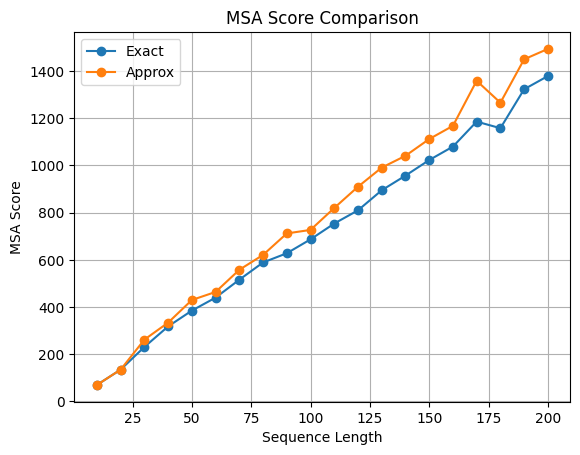

In [34]:
import matplotlib.pyplot as plt

# Data
data_exact = {'100': 687, '10': 70, '110': 754, '120': 810, '130': 895, '140': 957, '150': 1023, '160': 1080, '170': 1186, '180': 1158, '190': 1323, '200': 1379, '20': 135, '30': 231, '40': 318, '50': 385, '60': 440, '70': 516, '80': 589, '90': 628}
data_approx = {'100': 727, '10': 70, '110': 820, '120': 910, '130': 991, '140': 1041, '150': 1112, '160': 1168, '170': 1359, '180': 1266, '190': 1450, '200': 1494, '20': 135, '30': 262, '40': 334, '50': 430, '60': 464, '70': 558, '80': 621, '90': 712}

# Convert dictionary keys to integers and sort them
sorted_keys = sorted(map(int, data_exact.keys()))

# Get corresponding values for sorted keys
sorted_values_exact = [data_exact[str(key)] for key in sorted_keys]
sorted_values_approx = [data_approx[str(key)] for key in sorted_keys]

# Plot the data
plt.plot(sorted_keys, sorted_values_exact, marker='o', linestyle='-', label='Exact')
plt.plot(sorted_keys, sorted_values_approx, marker='o', linestyle='-', label='Approx')

# Label the axes
plt.xlabel('Sequence Length')
plt.ylabel('MSA Score')

plt.title('MSA Score Comparison')  # Add title
plt.grid(True)  # Show grid
plt.legend()  # Get a legend

# Show the plot
plt.show()


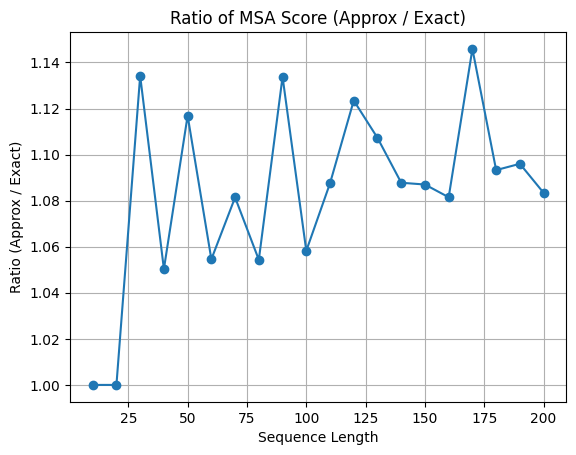

In [36]:

# Data
data_exact = {'100': 687, '10': 70, '110': 754, '120': 810, '130': 895, '140': 957, '150': 1023, '160': 1080, '170': 1186, '180': 1158, '190': 1323, '200': 1379, '20': 135, '30': 231, '40': 318, '50': 385, '60': 440, '70': 516, '80': 589, '90': 628}
data_approx = {'100': 727, '10': 70, '110': 820, '120': 910, '130': 991, '140': 1041, '150': 1112, '160': 1168, '170': 1359, '180': 1266, '190': 1450, '200': 1494, '20': 135, '30': 262, '40': 334, '50': 430, '60': 464, '70': 558, '80': 621, '90': 712}


# Convert dictionary keys to integers and sort them
sorted_keys = sorted(map(int, data_exact.keys()))

# Get corresponding values for sorted keys
sorted_values_exact = [data_exact[str(key)] for key in sorted_keys]
sorted_values_approx = [data_approx[str(key)] for key in sorted_keys]

# Calculate the ratio of data_approx to data_exact
ratio_values = [approx / exact for exact, approx in zip(sorted_values_exact, sorted_values_approx)]

# Plot the ratio
plt.plot(sorted_keys, ratio_values, marker='o', linestyle='-')

# Label the axes
plt.xlabel('Sequence Length')
plt.ylabel('Ratio (Approx / Exact)')

plt.title('Ratio of MSA Score (Approx / Exact)')  # Add title
plt.grid(True)  # Show grid

# Show the plot
plt.show()